# Real Part of Impedance – Density Plot (ΔZ vs H and ω)

This notebook presents the analysis and visualization of the real part of the impedance (ΔZ) for two thin film samples: Py/Ag and Py/SnTe. The data is processed using interpolation and plotted as 2D density maps.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data from Py/Ag and Py/SnTe samples
pyag =  pd.read_table('PyAgAg_vid.txt', names=['H', 'F', 'dR', 'dIm', 'Z'])
pysnte = pd.read_table('PySnTeAg_vid.txt', names=['H', 'F', 'dR', 'dIm', 'Z'])


## Prepare Data and Create Meshgrid

We create a regular grid for the magnetic field (H) and frequency (ω), and interpolate ΔZ values (real part of the impedance) over this mesh using cubic interpolation.


In [16]:
# Extract relevant columns
H = pyag['H']
F = pyag['F'] / 1e9  # Convert frequency to GHz
R_pyag = pyag['dR']
R_pysnte = pysnte['dR']

# Create regular grid
H_grid = np.linspace(H.min(), H.max(), 300)
F_grid = np.linspace(F.min(), F.max(), 300)
H_mesh, F_mesh = np.meshgrid(H_grid, F_grid)

# Interpolate ΔZ (real part) for both samples
Z_pyag = griddata((H, F), R_pyag, (H_mesh, F_mesh), method='cubic')
Z_pysnte = griddata((H, F), R_pysnte, (H_mesh, F_mesh), method='cubic')


## Plot Density Maps

Contour plots for the real part of the impedance (ΔZ) as a function of magnetic field and frequency for both samples.


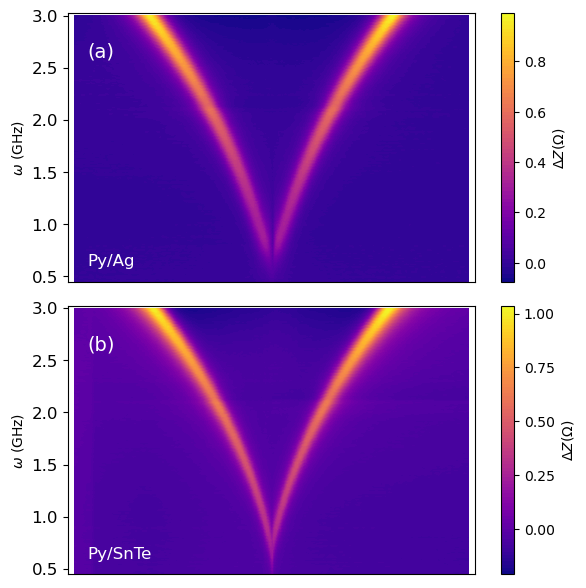

In [17]:
plt.figure(figsize=(6, 6))

# Py/Ag
plt.subplot(2, 1, 1)
cp1 = plt.contourf(H_mesh, F_mesh, Z_pyag, levels=100, cmap='plasma')
cbar1 = plt.colorbar(cp1)
cbar1.set_label(r'$\Delta Z (\Omega)$')
plt.text(-280, 2.6, "(a)", fontsize=14, color="white")
plt.text(-280, 0.6, "Py/Ag", fontsize=12, color="white")
cbar1.set_ticks([0.8, 0.6, 0.4, 0.2, 0.0])
plt.ylabel(r'$\omega$ (GHz)')
plt.xlim(-310, 310)
plt.ylim(0.45, 3.02)
plt.xticks([])
plt.yticks(fontsize=12)

# Py/SnTe
plt.subplot(2, 1, 2)
cp2 = plt.contourf(H_mesh, F_mesh, Z_pysnte, levels=100, cmap='plasma')
cbar2 = plt.colorbar(cp2)
cbar2.set_label(r'$\Delta Z (\Omega)$')
plt.text(-280, 2.6, "(b)", fontsize=14, color="white")
plt.text(-280, 0.6, "Py/SnTe", fontsize=12, color="white")
cbar2.set_ticks([1.00, 0.75, 0.50, 0.25, 0.0])
plt.ylabel(r'$\omega$ (GHz)')
plt.xlim(-310, 310)
plt.ylim(0.45, 3.02)
plt.xticks([])
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


## Conclusion

In this notebook, we analyzed and visualized the real part of the impedance (ΔZ) as a function of magnetic field (H) and frequency (ω) for two thin film samples: Py/Ag and Py/SnTe. Using interpolation and 2D contour plots, we observed how ΔZ varies across the parameter space, allowing for a clear comparison between the samples.

This type of visualization helps identify regions of interest in the data and can support the interpretation of physical properties related to spin transport and magnetoresistance.

### Next steps

- Plot the imaginary part of the impedance (ΔIm) for both samples  
- Compare behavior at fixed frequency or fixed field values  
- Apply smoothing or filtering to reduce experimental noise  
- Expand this analysis to other sample configurations or temperatures  


#### Bonus: another way to do the same thing

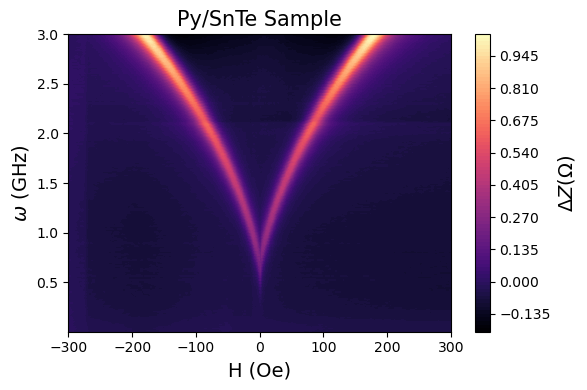

In [18]:
# analysis_spin_snte.py


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


def load_data(file_path):
    """Load experimental data from a tab-delimited text file."""
    return pd.read_table(file_path, names=['H', 'F', 'dR', 'dIm', 'Z'])


def prepare_grid(data, num_points=300):
    """Create interpolation grid."""
    H = data['H']
    F = data['F'] / 1e9  # Convert frequency to GHz
    R = data['dR']

    H_grid = np.linspace(H.min(), H.max(), num_points)
    F_grid = np.linspace(F.min(), F.max(), num_points)
    H_mesh, F_mesh = np.meshgrid(H_grid, F_grid)
    R_interp = griddata((H, F), R, (H_mesh, F_mesh), method='cubic')

    return H_mesh, F_mesh, R_interp


def plot_density(H_mesh, F_mesh, Z_grid, title="Py/SnTe Sample", cmap='magma'):
    """Plot 2D contour of the real part of impedance."""
    plt.figure(figsize=(6, 4))
    cp = plt.contourf(H_mesh, F_mesh, Z_grid, levels=100, cmap=cmap)
    cbar = plt.colorbar(cp)
    cbar.set_label(r'$\Delta Z (\Omega)$', fontsize=14)
    plt.xlabel('H (Oe)', fontsize=14)
    plt.ylabel(r'$\omega$ (GHz)', fontsize=14)
    plt.title(title, fontsize=15)
    plt.tight_layout()
    plt.show()


def main():
    # Path to data file (replace with your real file path)
    file_path = 'PySnTeAg_vid.txt'

    # Load and prepare data
    data = load_data(file_path)
    H_mesh, F_mesh, R_grid = prepare_grid(data)

    # Plot results
    plot_density(H_mesh, F_mesh, R_grid)


if __name__ == "__main__":
    main()